In [17]:
!pip install matplotlib

[*********************100%***********************]  1 of 1 completed


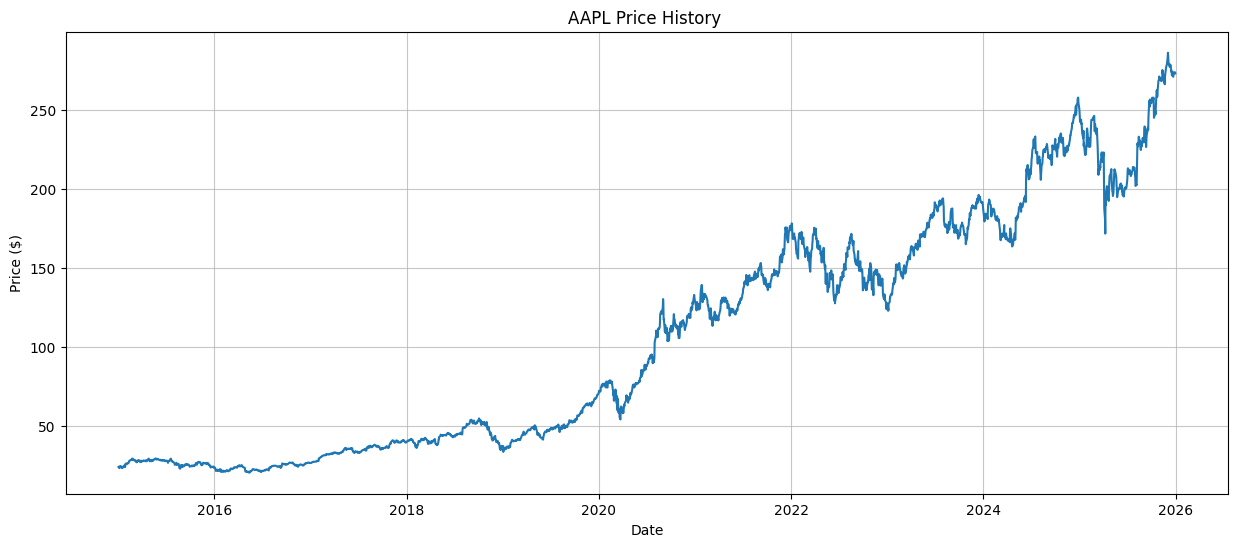

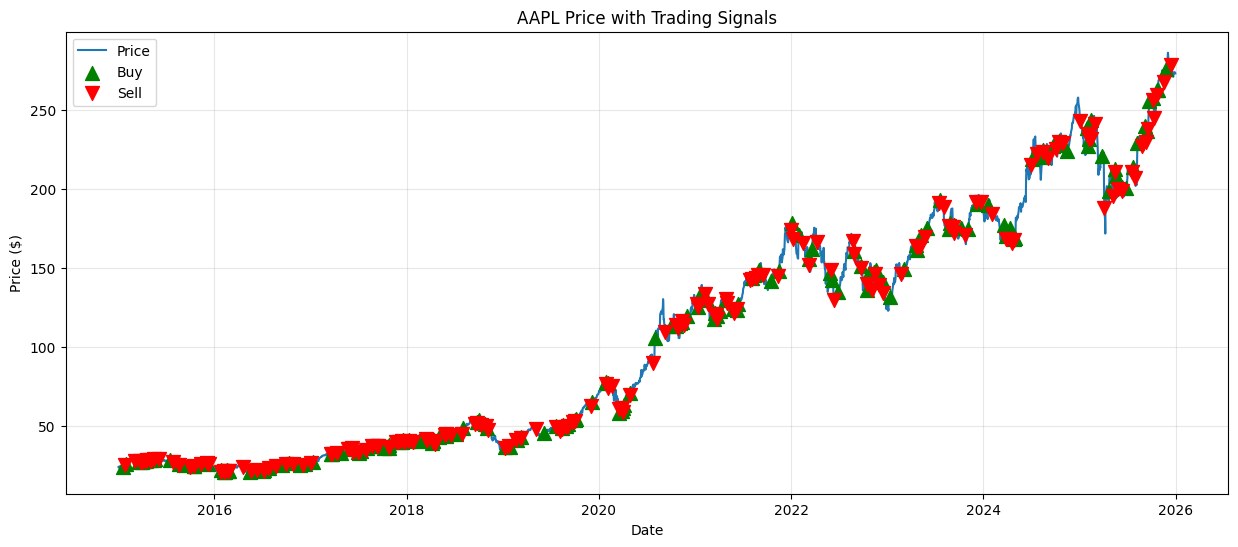

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#step 1 load price data
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-12-31'
#download data for apple and time frame from yahoo api
data = yf.download(ticker, start=start_date, end=end_date) # make data frame
data = data[['Close']].copy() # only keep the close column, wont change the original data frame 

#plot appl price using matplotlib
plt.figure(figsize=(15, 6))  #should be big enough can change later
plt.plot(data.index, data['Close']) #using previous data and index(date from yfinance), x axis = date, y axis = price
plt.title(f'{ticker} Price History ')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(alpha=0.7)
plt.show()

# step 2 rate of change indicator parameters and signals
roc_n = 10  # roc period = past 10 days - play around with this
roc_threshold = 0.3 # can change asw
data['ROC'] = ((data['Close'] - data['Close'].shift(roc_n)) / data['Close'].shift(roc_n)) * 100 # roc formula to calculate the percentage change

data['Signal'] = np.where(data['ROC'] > roc_threshold, 1, 0) # if roc > threshold, signal = 1 (buy), else signal = 0 (sell)
data['Position'] = data['Signal'].shift(1).fillna(0) # avoid look-ahead bias
# visualise this 
# 1. Price with buy/sell signals
buy_signals = data['Position'].diff() == 1
sell_signals = data['Position'].diff() == -1

plt.figure(figsize=(15, 6))
plt.plot(data.index, data['Close'], label='Price', linewidth=1.5)
plt.scatter(data[buy_signals].index, data[buy_signals]['Close'], 
           marker='^', color='green', s=100, label='Buy', zorder=5)
plt.scatter(data[sell_signals].index, data[sell_signals]['Close'],
           marker='v', color='red', s=100, label='Sell', zorder=5)
plt.title(f'{ticker} Price with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
